In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('/content/data.csv')

In [4]:
data.shape

(569, 33)

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.dropna(axis=1,inplace=True)

In [7]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Normalizing the labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,1] = labelencoder.fit_transform(data.iloc[:,1].values)

In [9]:
X=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [10]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

In [11]:
X_train[0]

array([1.300e+01, 2.182e+01, 8.750e+01, 5.198e+02, 1.273e-01, 1.932e-01,
       1.859e-01, 9.353e-02, 2.350e-01, 7.389e-02, 3.063e-01, 1.002e+00,
       2.406e+00, 2.432e+01, 5.731e-03, 3.502e-02, 3.553e-02, 1.226e-02,
       2.143e-02, 3.749e-03, 1.549e+01, 3.073e+01, 1.062e+02, 7.393e+02,
       1.703e-01, 5.401e-01, 5.390e-01, 2.060e-01, 4.378e-01, 1.072e-01])

In [12]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

In [13]:
X_train[0]

array([-0.31359856,  0.57175652, -0.17745057, -0.37831355,  2.21037101,
        1.66901742,  1.20826178,  1.1553479 ,  1.92147506,  1.5241152 ,
       -0.33252552, -0.39661616, -0.21214376, -0.32780244, -0.43251601,
        0.49601815,  0.0856444 ,  0.0558692 ,  0.07265366, -0.03384108,
       -0.15199168,  0.80083379, -0.02422952, -0.2390295 ,  1.67537019,
        1.78334507,  1.26839262,  1.40465551,  2.259042  ,  1.26093852])

In [14]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [17]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LR.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LR.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.9906103286384976
LogisticRegressionModel Test Score is :  0.972027972027972


In [19]:
#Calculating Prediction
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)

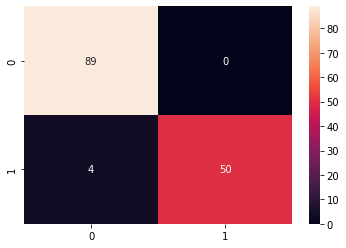

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [22]:
from sklearn.metrics import accuracy_score
print('accuracy score',accuracy_score(y_test,y_pred))

accuracy score 0.972027972027972
